<a href="https://colab.research.google.com/github/KhanradCoder/TwitterBotDetection/blob/master/TwitterBotDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [ ]:
import pandas as pd
dataset = pd.read_csv('twitter_bot_data.csv')
dataset.head()

,followers_count,friends_count,favorites_count,statuses_count,default_profile,default_profile_image,verified,bot
0,1291,0,0,78554,1,0,0,1
1,1,349,38,31,1,0,0,1
2,1086,0,0,713,1,0,0,1
3,33,0,0,676,1,1,0,1
4,11,745,146,185,0,0,0,1


In [ ]:
x = dataset.drop(["bot"], axis=1)
y = dataset["bot"]

Split Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgboost = xgb.predict(x_train)
from sklearn.metrics import confusion_matrix
cm_xgboost = confusion_matrix(y_train, y_pred_xgboost)
print(cm_xgboost)

tp = cm_xgboost[0][0]
fn = cm_xgboost[1][0]
fp = cm_xgboost[0][1]
print("Precision:",tp/(tp+fn))
print("Recall:",tp/(tp+fp))

[[1125   71]
 [ 108  933]]
Precision: 0.9124087591240876
Recall: 0.9406354515050167


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_log_reg = log_reg.predict(x_train)
from sklearn.metrics import confusion_matrix
cm_log_reg = confusion_matrix(y_train, y_pred_log_reg)
print(cm_log_reg)

tp = cm_log_reg[0][0]
fn = cm_log_reg[1][0]
fp = cm_log_reg[0][1]
print("Precision:",tp/(tp+fn))
print("Recall:",tp/(tp+fp))

[[838 358]
 [202 839]]
Precision: 0.8057692307692308
Recall: 0.7006688963210702


Evaluation (ROC Curve)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_xgb, tpr_xgb, _ = roc_curve(y_train, y_pred_xgboost)
auc_xgb = roc_auc_score(y_train, y_pred_xgboost)

print("ROC AUC For XGB:",auc_xgb)

ROC AUC For XGB: 0.918444526905246


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_log, tpr_log, _ = roc_curve(y_train, y_pred_log_reg)
auc_log = roc_auc_score(y_train, y_pred_log_reg)

print("ROC AUC For XGB:",auc_log)

ROC AUC For XGB: 0.7533123540202853


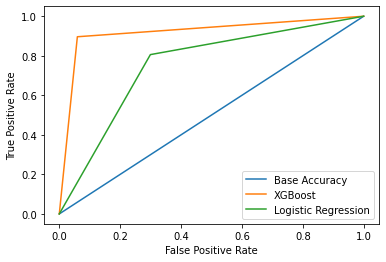

In [ ]:
plt.plot([0,0.5,1], [0,0.5,1], label='Base Accuracy')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()